In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import os
import warnings

warnings.filterwarnings('ignore')

# Cria o diretório para salvar as imagens
output_dir = 'outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

print("Ambiente configurado e pasta 'outputs' criada.")

Ambiente configurado e pasta 'outputs' criada.


In [2]:
print("\n--- Etapa 1: Exploração dos Dados (Carregamento) ---")

# URLs dos dados
url_train = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.trn'
url_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/satimage/sat.tst'

# Os dados são separados por espaço
df_train = pd.read_csv(url_train, sep=' ', header=None)
df_test = pd.read_csv(url_test, sep=' ', header=None)

# Combinando os dois datasets
df_full = pd.concat([df_train, df_test])

# Renomeando as colunas (36 features + 1 target)
col_names = [f'feature_{i}' for i in range(1, 37)] + ['target']
df_full.columns = col_names

print("Dataset de Satélite (Statlog) carregado e combinado.")
display(df_full.head())


--- Etapa 1: Exploração dos Dados (Carregamento) ---
Dataset de Satélite (Statlog) carregado e combinado.


feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0         92        115        120         94         84        102   
1         84        102        106         79         84        102   
2         84        102        102         83         80        102   
3         80        102        102         79         84         94   
4         84         94        102         79         80         94   

   feature_7  feature_8  feature_9  feature_10  ...  feature_28  feature_29  \
0        106         79         84         102  ...         104          88   
1        102         83         80         102  ...         100          84   
2        102         79         84          94  ...          87          84   
3        102         79         80          94  ...          79          84   
4         98         76         80         102  ...          79          84   

   feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  \
0         121         128         100          84         107         113   
1         107         113          87          84          99         104   
2          99         104          79          84          99         104   
3          99         104          79          84         103         104   
4         103         104          79          79         107         109   

   feature_36  target  
0          87       3  
1          79       3  
2          79       3  
3          79       3  
4          87       3  

[5 rows x 37 columns]


--- Etapa 1: Exploração dos Dados (Análise) ---

Informações Gerais:
<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 0 to 1999
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   feature_1   6435 non-null   int64
 1   feature_2   6435 non-null   int64
 2   feature_3   6435 non-null   int64
 3   feature_4   6435 non-null   int64
 4   feature_5   6435 non-null   int64
 5   feature_6   6435 non-null   int64
 6   feature_7   6435 non-null   int64
 7   feature_8   6435 non-null   int64
 8   feature_9   6435 non-null   int64
 9   feature_10  6435 non-null   int64
 10  feature_11  6435 non-null   int64
 11  feature_12  6435 non-null   int64
 12  feature_13  6435 non-null   int64
 13  feature_14  6435 non-null   int64
 14  feature_15  6435 non-null   int64
 15  feature_16  6435 non-null   int64
 16  feature_17  6435 non-null   int64
 17  feature_18  6435 non-null   int64
 18  feature_19  6435 non-null   int64
 19  feat

feature_1    feature_2    feature_3    feature_4    feature_5  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000   
mean     69.400000    83.594872    99.290598    82.592696    69.150272   
std      13.605871    22.882234    16.645944    18.897674    13.561197   
min      39.000000    27.000000    53.000000    33.000000    39.000000   
25%      60.000000    71.000000    85.000000    69.000000    60.000000   
50%      68.000000    87.000000   101.000000    81.000000    68.000000   
75%      80.000000   103.000000   113.000000    92.000000    80.000000   
max     104.000000   137.000000   140.000000   154.000000   104.000000   

         feature_6    feature_7    feature_8    feature_9   feature_10  ...  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000  ...   
mean     83.243512    99.110645    82.497125    68.912354    82.893085  ...   
std      22.886495    16.664088    18.940923    13.470599    22.862255  ...   
min      27.000000    50.000000    29.000000    40.000000    27.000000  ...   
25%      71.000000    85.000000    69.000000    60.000000    71.000000  ...   
50%      85.000000   101.000000    81.000000    67.000000    85.000000  ...   
75%     103.000000   113.000000    92.000000    79.000000   102.000000  ...   
max     137.000000   145.000000   157.000000   104.000000   130.000000  ...   

        feature_28   feature_29   feature_30   feature_31   feature_32  \
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000   
mean     82.660606    68.944056    83.145610    99.111888    82.618026   
std      18.991281    13.492684    22.847199    16.704305    19.043661   
min      29.000000    39.000000    27.000000    50.000000    29.000000   
25%      69.000000    60.000000    71.000000    85.000000    69.000000   
50%      81.000000    68.000000    85.000000   100.000000    81.000000   
75%      92.000000    79.000000   103.000000   113.000000    92.000000   
max     154.000000   104.000000   130.000000   145.000000   157.000000   

        feature_33   feature_34   feature_35   feature_36       target  
count  6435.000000  6435.000000  6435.000000  6435.000000  6435.000000  
mean     68.727584    82.858897    98.926030    82.505361     3.668687  
std      13.401603    22.816959    16.695488    19.054274     2.214052  
min      39.000000    27.000000    50.000000    29.000000     1.000000  
25%      60.000000    71.000000    85.000000    68.000000     2.000000  
50%      67.000000    84.000000   100.000000    81.000000     3.000000  
75%      79.000000   103.000000   113.000000    92.000000     5.000000  
max     104.000000   130.000000   145.000000   157.000000     7.000000  

[8 rows x 37 columns]


Distribuição das Classes (Alvo):
target
1    1533
2     703
3    1358
4     626
5     707
7    1508
Name: count, dtype: int64


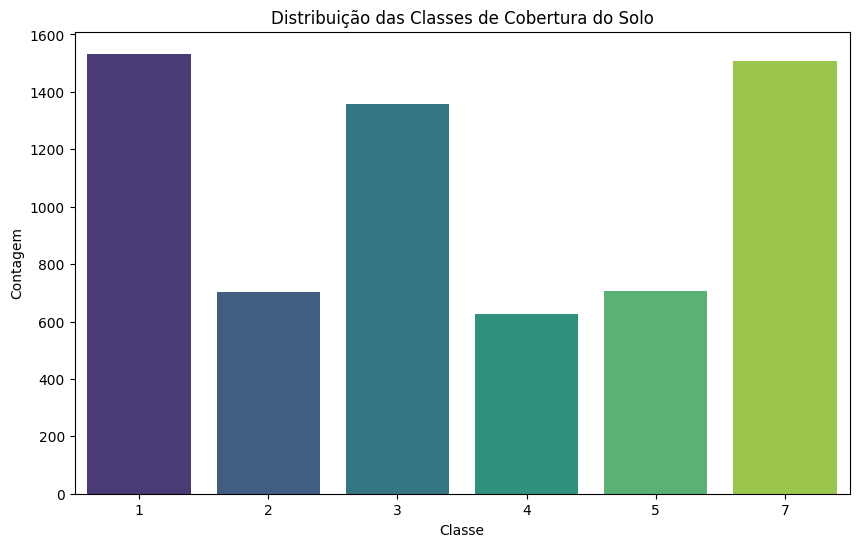

In [3]:
print("\n--- Etapa 1: Exploração dos Dados (Análise) ---")

print("\nInformações Gerais:")
df_full.info()

print("\nEstatísticas Descritivas:")
display(df_full.describe())

# A classe alvo (target) tem 6 categorias (1, 2, 3, 4, 5, 7 - o 6 não é usado neste dataset)
print("\nDistribuição das Classes (Alvo):")
print(df_full['target'].value_counts().sort_index())

# Plotando a distribuição
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=df_full, palette='viridis')
plt.title('Distribuição das Classes de Cobertura do Solo')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.savefig(f'{output_dir}/1_distribuicao_classes.png', dpi=300, bbox_inches='tight')
plt.show()

In [4]:
print("\n--- Etapa 2: Pré-processamento ---")

# Verificação de valores ausentes
print("\nValores ausentes por coluna:")
print(df_full.isnull().sum().sum())
print(">>> Nenhum valor ausente encontrado.")

# Separando features (X) e target (y)
X = df_full.drop('target', axis=1)
y = df_full['target']

# Normalização (Padronização)
# Embora o Random Forest não seja sensível à escala, a rubrica exige normalização.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(">>> Dados padronizados com StandardScaler.")


--- Etapa 2: Pré-processamento ---

Valores ausentes por coluna:
0
>>> Nenhum valor ausente encontrado.
>>> Dados padronizados com StandardScaler.


In [5]:
print("\n--- Etapa 3: Divisão dos Dados ---")

# Separação em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")


--- Etapa 3: Divisão dos Dados ---
Tamanho do conjunto de treino: 5148 amostras
Tamanho do conjunto de teste: 1287 amostras


In [6]:
print("\n--- Etapa 4: Treinamento do Modelo Random Forest ---")

# Instanciando o modelo
# n_estimators=100 (100 árvores) é um bom padrão
# random_state=42 para reprodutibilidade
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Treinando o modelo
rf_model.fit(X_train, y_train)

print(">>> Modelo Random Forest treinado com sucesso.")


--- Etapa 4: Treinamento do Modelo Random Forest ---
>>> Modelo Random Forest treinado com sucesso.



--- Etapa 5: Avaliação do Modelo ---
Acurácia do Modelo: 0.9091 (ou 90.91%)

Relatório de Classificação:
              precision    recall  f1-score   support

           1       0.96      0.98      0.97       307
           2       0.99      0.96      0.97       141
           3       0.87      0.97      0.92       272
           4       0.77      0.58      0.66       125
           5       0.93      0.87      0.90       141
           7       0.90      0.91      0.90       301

    accuracy                           0.91      1287
   macro avg       0.90      0.88      0.89      1287
weighted avg       0.91      0.91      0.91      1287



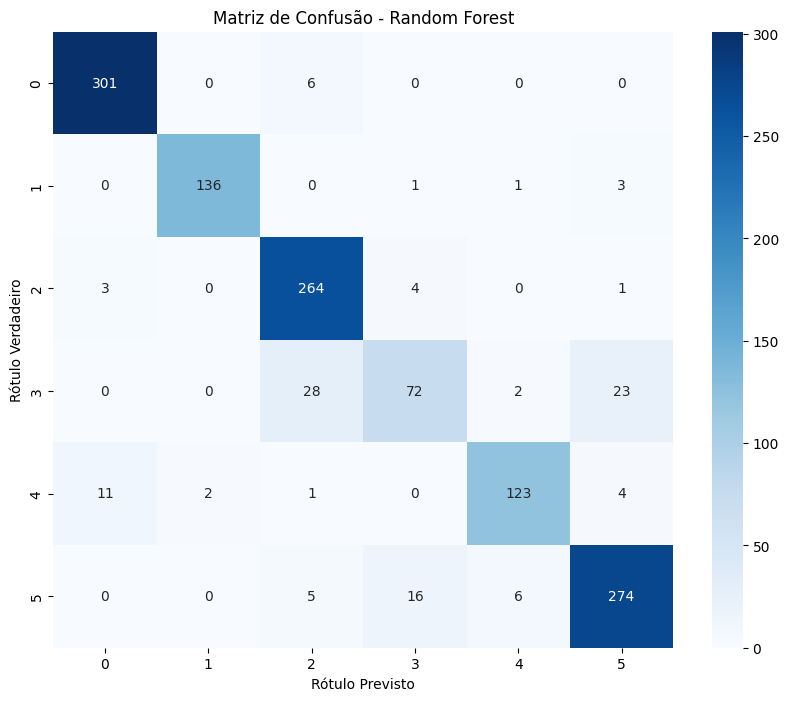

In [7]:
print("\n--- Etapa 5: Avaliação do Modelo ---")

# Fazendo predições no conjunto de teste
y_pred = rf_model.predict(X_test)

# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do Modelo: {accuracy:.4f} (ou {accuracy*100:.2f}%)")

# Relatório de Classificação Detalhado
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Gerando a Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.savefig(f'{output_dir}/2_matriz_confusao.png', dpi=300, bbox_inches='tight')
plt.show()


--- Análise Adicional: Importância das Features ---


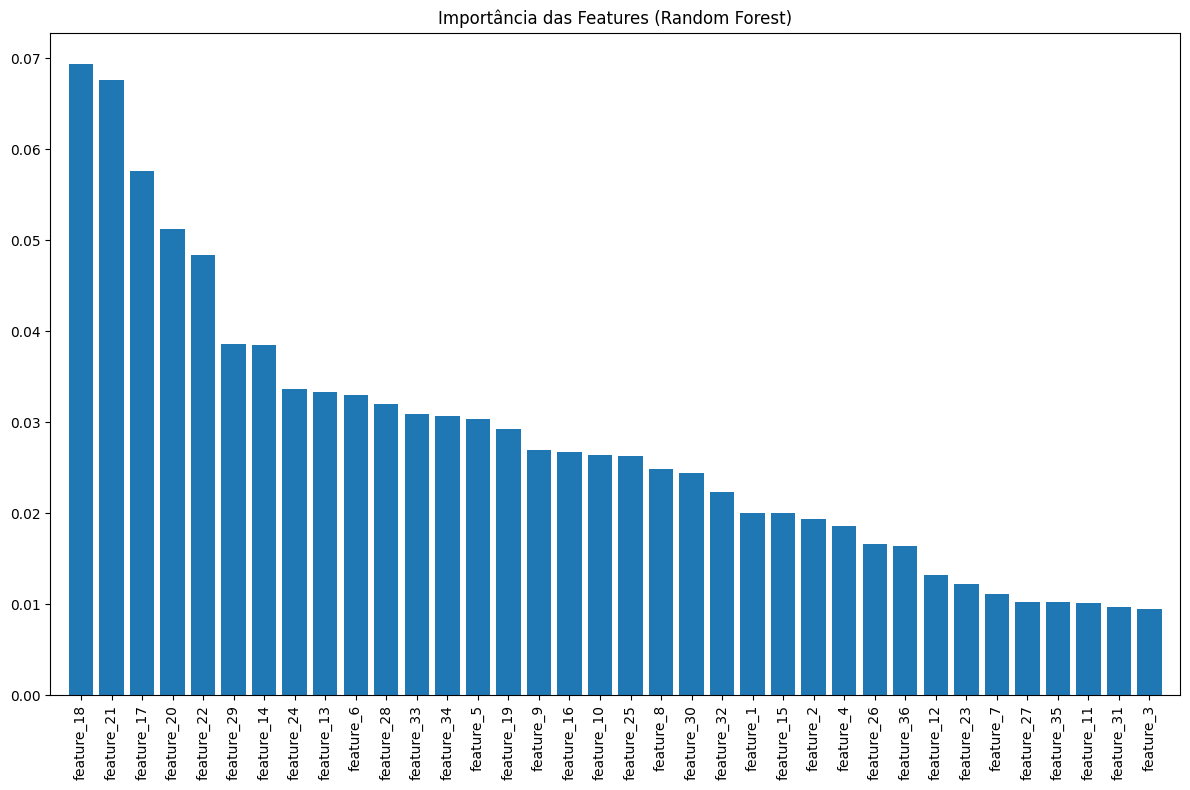

In [8]:
print("\n--- Análise Adicional: Importância das Features ---")

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.figure(figsize=(12, 8))
plt.title("Importância das Features (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.savefig(f'{output_dir}/3_importancia_features.png', dpi=300, bbox_inches='tight')
plt.show()